In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(), transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=5)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

<Figure size 640x480 with 1 Axes>

 frog truck truck  deer   car


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv6(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
if torch.cuda.is_available():
    net.cuda()
print(net)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
)


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
for epoch in range(30):  # loop over the dataset multiple times
    train_loss = 0.0
    for inputs, labels in train_loader:
        # get the inputs; data is a list of [inputs, labels]
        inputs = inputs.to(device)
        labels = labels.to(device=device, dtype=torch.int64)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*inputs.size(0)
    
    # Calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    
    #saving model for training losses
    torch.save(net.state_dict(), 'MY_MODEL.pt')
    print('epoch {} saved'.format(epoch))

Epoch: 0 	Training Loss: 1.676618
epoch 0 saved
Epoch: 1 	Training Loss: 1.296412
epoch 1 saved
Epoch: 2 	Training Loss: 1.148167
epoch 2 saved
Epoch: 3 	Training Loss: 1.063968
epoch 3 saved
Epoch: 4 	Training Loss: 1.003596
epoch 4 saved
Epoch: 5 	Training Loss: 0.960558
epoch 5 saved
Epoch: 6 	Training Loss: 0.935050
epoch 6 saved
Epoch: 7 	Training Loss: 0.909321
epoch 7 saved
Epoch: 8 	Training Loss: 0.895120
epoch 8 saved
Epoch: 9 	Training Loss: 0.876950
epoch 9 saved
Epoch: 10 	Training Loss: 0.859812
epoch 10 saved
Epoch: 11 	Training Loss: 0.855314
epoch 11 saved
Epoch: 12 	Training Loss: 0.843534
epoch 12 saved
Epoch: 13 	Training Loss: 0.839982
epoch 13 saved
Epoch: 14 	Training Loss: 0.829124
epoch 14 saved
Epoch: 15 	Training Loss: 0.823930
epoch 15 saved
Epoch: 16 	Training Loss: 0.825654
epoch 16 saved
Epoch: 17 	Training Loss: 0.817784
epoch 17 saved
Epoch: 18 	Training Loss: 0.811501
epoch 18 saved
Epoch: 19 	Training Loss: 0.807115
epoch 19 saved
Epoch: 20 	Training 

In [9]:
net.load_state_dict(torch.load('MY_MODEL.pt'))

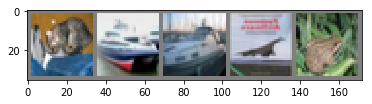

GroundTruth:    cat  ship  ship plane  frog


In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))

In [16]:
net.cpu()
outputs = net(images)

In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:    cat  ship  ship  ship  frog


In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 87 %
Accuracy of  bird : 53 %
Accuracy of   cat : 63 %
Accuracy of  deer : 62 %
Accuracy of   dog : 52 %
Accuracy of  frog : 80 %
Accuracy of horse : 83 %
Accuracy of  ship : 87 %
Accuracy of truck : 81 %
